In [1]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
import numpy as np
import pandas as pd
from parse import compile, parse
import mdtraj as mdt
import matplotlib.pyplot as plt

sys.path.append("../../analysis")
from rdc import compute_rdc
from add_sidechains import add_sidechains


In [2]:
exp_rdc = pd.read_csv(
    "ntailMV_rdc_nh_formartin.exp",
    sep=" ",
    header=None,
    index_col=0,
).squeeze()

In [ ]:
# basedir = Path("/home/gzappavigna/traj/20241018_ff99sb-ildn_opc_multidir")

# xtc = basedir / "19517a_132/md_nojump.xtc"
# pdb = xtc.with_suffix(".pdb")

# traj = mdt.load(xtc, top=pdb)


# one_every = round(100 / traj.timestep)
# inds = np.arange(0, traj.time.size, one_every)
# subtraj = traj[inds]
# df = compute_rdc(subtraj)



In [4]:
from pathlib import Path
import subprocess


ens_path = "../../MeV_NT_ens"
cmd = rf'find {ens_path}/ensemble_200_* -regex "^.*/[0-9]+a_132\.pdb$"'
res = subprocess.run(cmd, shell=True, capture_output=True, text=True)


pdbs = [Path(pdb) for pdb in res.stdout.splitlines()]
ens_trajs = add_sidechains(pdbs)

In [ ]:
ens_rdc = compute_rdc(ens_trajs, 9)

ValueError: operands could not be broadcast together with shapes (117,) (125,) 

: 

In [ ]:
sub_ens_rdc = ens_rdc.loc[ens_rdc.index.get_level_values("frame") < 100]

In [ ]:
sub_ens_rdc = sub_ens_rdc.groupby(level="resSeq").mean()

In [ ]:
sub_ens_rdc.index += 401 - 8

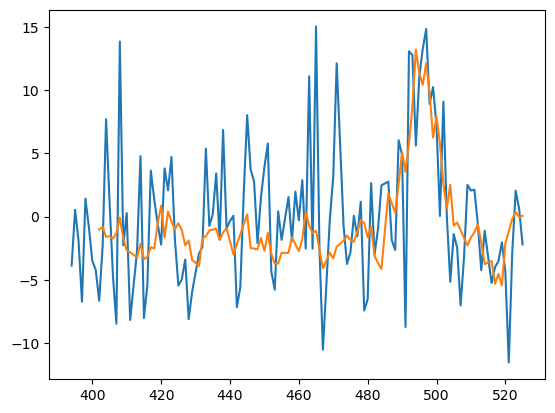

In [ ]:
plt.plot(sub_ens_rdc)
plt.plot(exp_rdc)

In [6]:
def compute_rdc_df(basedir, period=100):
    basedir = Path(basedir)

    xtcs = list(basedir.glob("*a_132/md_nojump.xtc"))
    pdbs = [xtc.with_suffix(".pdb") for xtc in xtcs]

    dfs = []

    for pdb, xtc in zip(pdbs, xtcs):
        conformer = parse("{:d}a_132", pdb.parent.name)[0]
        print(conformer)
        traj = mdt.load(xtc, top=pdb, frame=0)

        # one_every = round(period / traj.timestep)
        # inds = np.arange(0, traj.time.size, one_every)
        # subtraj = traj[inds]
        subtraj = traj[0]
        df = compute_rdc(subtraj)
        df["conformer"] = conformer

        dfs.append(df)

    df = pd.concat(dfs)
    df = df.set_index("conformer", append=True)

    return df


ref_rdc_df = compute_rdc_df("/home/gzappavigna/traj/20241018_ff99sb-ildn_opc_multidir")
cmap_rdc_df = compute_rdc_df("/home/gzappavigna/traj/20241025_ff99sb-ildn_opc_cmap_multidir/")



3097
6811
4622
7057
13589
11199
14470
10440
14017
8104
15062
9802
13573
10717
1528
19517
9380
7982
9613
9510
12724
5970
7169
17425
11038
6591
4618
1120
14037
836
6125
13939
17396
11561
1313
10072
3125
5033
7576
1911
15070
3359
12973
14122
8523
3069
15809
6734
6235
5813
15996
11591
16074
11618
4070
1386
812
2504
9056
2292
12877
10498
5188
16179
724
7054
13162
16527
12088
13889
3075
8041
13609
10099
16258
14744
2938
8508
4492
11972
7719
4425
290
1220
10216
2923
10777
1340
927
12237
1532
5731
6921
873
15776
7753
3097
6811
4622
7057
13589
11199
14470
10440
14017
8104
15062
9802
13573
10717
1528
19517
9380
7982
9613
9510
12724
5970
7169
17425
11038
6591
4618
1120
14037
836
6125
13939
17396
11561
1313
10072
3125
5033
7576
1911
15070
3359
12973
14122
8523
3069
15809
6734
6235
5813
15996
11591
16074
11618
4070
1386
812
2504
9056
2292
12877
10498
5188
16179
724
7054
13162
16527
12088
13889
3075
8041
13609
10099
16258
14744
2938
8508
4492
11972
7719
4425
290
1220
10216
2923
10777
1340
927
12237


In [56]:
ref_rdc_df.to_pickle("ref_rdc_df.pkl")
cmap_rdc_df.to_pickle("cmap_rdc_df.pkl")

In [89]:
ref_rdc_df = pd.read_pickle("ref_rdc_df.pkl")
cmap_rdc_df = pd.read_pickle("cmap_rdc_df.pkl")

In [7]:
ref_rdc_df.index = ref_rdc_df.index.set_levels(ref_rdc_df.index.levels[0] + 401 - 8, level=0)
cmap_rdc_df.index = cmap_rdc_df.index.set_levels(cmap_rdc_df.index.levels[0] + 401 - 8, level=0)

In [18]:
ref_rdc_df

,,,value
resSeq,frame,conformer,
394,0,3097,-20.161546
395,0,3097,39.070251
396,0,3097,36.211330
397,0,3097,-6.865098
398,0,3097,4.670947
...,...,...,...
521,0,7753,99.206897
522,0,7753,7.497907
523,0,7753,-19.302387


In [20]:
ref_rdc_df.groupby(["resSeq", "frame"])["value"].mean()

resSeq  frame
394     0        5.037408
395     0        3.474718
396     0       -1.237984
397     0       -6.673501
398     0        2.496600
                   ...   
521     0        2.591674
522     0       -4.101865
523     0        0.937255
524     0       -1.888436
525     0        0.728630
Name: value, Length: 125, dtype: float64

In [121]:
def avg_rdc_rmsd(rdc_df, ref):
    avg = rdc_df.groupby(["resSeq", "frame"])["value"].mean()

    rmsds = []

    for i in range(0, 100+1):
        rmsds.append(np.mean((avg.xs(i, level="frame") - ref).dropna() ** 2) ** 0.5)

    return rmsds

In [136]:
ref_rdc_df

value
resSeq frame conformer           
394    0     3097      -20.161546
       1     3097       -6.412459
       2     3097      -34.143115
       3     3097       44.828099
       4     3097       -5.048133
...                           ...
525    96    7753      -60.043546
       97    7753      -55.407875
       98    7753      -70.206232
       99    7753      -25.296899
       100   7753      -67.070253

[1212000 rows x 1 columns]

In [21]:
avg = ref_rdc_df.groupby(["resSeq", "frame"])["value"].mean()


In [22]:
avg

resSeq  frame
394     0        5.037408
395     0        3.474718
396     0       -1.237984
397     0       -6.673501
398     0        2.496600
                   ...   
521     0        2.591674
522     0       -4.101865
523     0        0.937255
524     0       -1.888436
525     0        0.728630
Name: value, Length: 125, dtype: float64

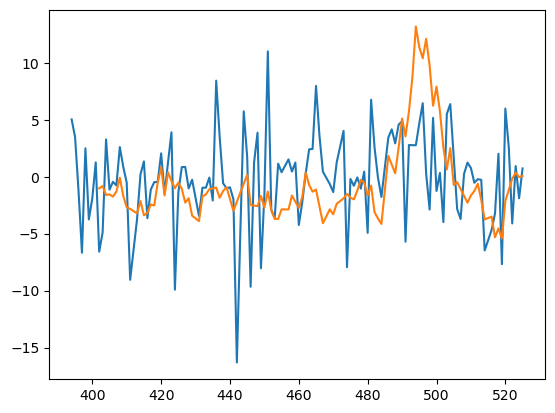

In [24]:
plt.plot(avg.xs(0, level="frame"))
plt.plot(exp_rdc)

In [165]:
ref_rdc_rmsd = avg_rdc_rmsd(ref_rdc_df, exp_rdc)
cmap_rdc_rmsd = avg_rdc_rmsd(cmap_rdc_df, exp_rdc)

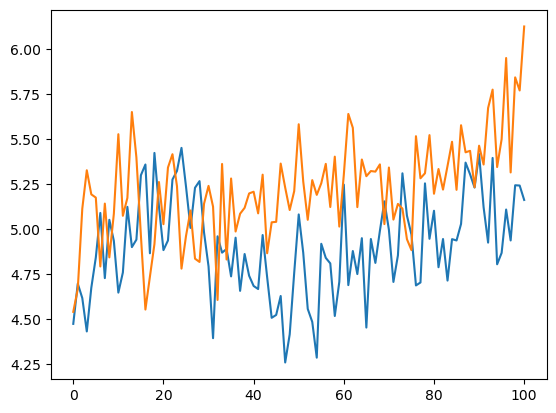

In [166]:
plt.plot(ref_rdc_rmsd)
plt.plot(cmap_rdc_rmsd)

In [164]:
ref_rdc_df.groupby(["resSeq", "frame"])["value"].mean()

resSeq  frame
394     0        5.037408
        1       -0.403040
        2        3.456290
        3        2.460441
        4       -4.449848
                   ...   
525     96       1.700023
        97      -0.020839
        98      -2.616721
        99      -1.860914
        100     -3.545798
Name: value, Length: 12625, dtype: float64